In [1]:
import os

#csv_path = "../../../DataSetStore/twitter_msg_sentiment_anal/twitter_sentiment_analysis.csv"
csv_path = "../../../DataSetStore/twitter_msg_sentiment_anal/train.csv"

In [2]:
max_words = 2000
max_len = 20
num_classes = 1

# Training
epochs = 5
batch_size = 512
print_batch_n = 100

In [4]:
#!pip install pandas
#!pip install stop-words pymorphy2
#!pip install invoke
#!pip install nltk
#!pip install imblearn

In [5]:
import pandas as pd

df = pd.read_csv(csv_path)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [7]:
from stop_words import get_stop_words

stop_word_set = set(get_stop_words("en"))
stop_word_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [8]:
from string import punctuation
punctuation_set = set (punctuation)
punctuation_set

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [9]:
from string import ascii_lowercase
ascii_list= list(ascii_lowercase)
ascii_list.append(" ")
en_alphabet_set = set(ascii_list)
en_alphabet_set

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [10]:
#It's failed due to python version
#from pymorphy2 import MorphAnalyzer
#morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt)
    txt = txt.lower()
    txt = "".join(char for char in txt if char not in punctuation_set)
    txt = "".join(char for char in txt if char in en_alphabet_set)
    #txt = [morpher.parse(w)[0].normal_form for w in txt.split() if w not in stop_word_set]
    txt =  [w for w in txt.split() if w not in stop_word_set]
    txt = " ".join(txt)
    return txt


In [11]:
from tqdm import tqdm 
tqdm.pandas()

df_st1 = df.copy()
df_st1['tweet'] = df_st1['tweet'].progress_apply(preprocess_text)
df_st1_twt = df_st1['tweet']

100%|██████████| 31962/31962 [00:00<00:00, 134004.88it/s]


In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

all_tweet_words = " ".join(df_st1_twt)
tokens = word_tokenize(all_tweet_words)
tokens[:10]

[nltk_data] Downloading package punkt to /home/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['user',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'dysfunction',
 'run',
 'user',
 'user']

In [13]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [14]:
from nltk.probability import FreqDist

dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]  # вычитание 1 для padding
len(tokens_filtered_top)

1999

In [15]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}
vocabulary

{'user': 1,
 'love': 2,
 'day': 3,
 'happy': 4,
 'amp': 5,
 'just': 6,
 'will': 7,
 'im': 8,
 'u': 9,
 'life': 10,
 'time': 11,
 'like': 12,
 'today': 13,
 'now': 14,
 'new': 15,
 'positive': 16,
 'thankful': 17,
 'get': 18,
 'people': 19,
 'bihday': 20,
 'good': 21,
 'cant': 22,
 'one': 23,
 'see': 24,
 'can': 25,
 'dont': 26,
 'fathers': 27,
 'smile': 28,
 'go': 29,
 'want': 30,
 'take': 31,
 'work': 32,
 'healthy': 33,
 'fun': 34,
 'weekend': 35,
 'got': 36,
 'summer': 37,
 'make': 38,
 'days': 39,
 'family': 40,
 'friday': 41,
 'us': 42,
 'best': 43,
 'need': 44,
 'way': 45,
 'beautiful': 46,
 'great': 47,
 'bull': 48,
 'friends': 49,
 'going': 50,
 'first': 51,
 'really': 52,
 'wait': 53,
 'morning': 54,
 'music': 55,
 'ur': 56,
 'back': 57,
 'world': 58,
 'know': 59,
 'fathersday': 60,
 'tomorrow': 61,
 'cute': 62,
 'week': 63,
 'sad': 64,
 'never': 65,
 'orlando': 66,
 'think': 67,
 'happiness': 68,
 'feel': 69,
 'blog': 70,
 'sunday': 71,
 'trump': 72,
 'well': 73,
 'home': 74,

In [25]:
df_st1['label'].value_counts()


label
0    29720
1     2242
Name: count, dtype: int64

In [42]:
import numpy as np


def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text)
    tokens_filtered = tokens#[word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])

    padding = [0] * (maxlen-len(result))
    return result[-maxlen:] + padding

#Y=2*(np.array(df_st1["label"])-0.5)
Y=np.array(df_st1["label"])
X=np.array([text_to_sequence(tweet, max_len) for tweet in df_st1["tweet"]])

print ("Class balance: ",np.unique(Y, return_counts=True))


Class balance:  (array([0, 1]), array([29720,  2242]))


In [98]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size=0.7, shuffle=True)

#x_train,y_train
print ("Class balance: ",np.unique(y_train, return_counts=True))

Class balance:  (array([0, 1]), array([20772,  1601]))


In [99]:

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

#
# Sampling:------------------------------------------------------------
sampler = TomekLinks();
x_train,y_train = sampler.fit_resample(x_train,y_train);
print ("TomekLinks:\t",np.unique(y_train, return_counts=True))

renn = RepeatedEditedNearestNeighbours()
x_train, y_train = renn.fit_resample(x_train, y_train)
print ("RepeatedEditedNearestNeighbours:\t",np.unique(y_train, return_counts=True))

renn = EditedNearestNeighbours()
x_train, y_train = renn.fit_resample(x_train, y_train)
print ("EditedNearestNeighbours:\t",np.unique(y_train, return_counts=True))

allknn = AllKNN()
x_train, y_train = allknn.fit_resample(x_train, y_train)
print ("AllKNN:\t",np.unique(y_train, return_counts=True))

# smt = SMOTE()
# x_train, y_train = smt.fit_resample(x_train, y_train)
# print ("SMOTE:\t",np.unique(y_train, return_counts=True))

# rus = RandomUnderSampler(random_state=0)
# x_train, y_train = rus.fit_resample(x_train, y_train)
# print ("RandomUnderSampler:\t",np.unique(y_train, return_counts=True))



TomekLinks:	 (array([0, 1]), array([20219,  1601]))
RepeatedEditedNearestNeighbours:	 (array([0, 1]), array([15284,  1601]))
EditedNearestNeighbours:	 (array([0, 1]), array([15284,  1601]))
AllKNN:	 (array([0, 1]), array([15284,  1601]))


In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

class DataWrapper(Dataset):
    def __init__(self, data, target):
        self.data = torch.from_numpy(data).long()
        self.target = torch.from_numpy(target).long()
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
                    
        return x, y
    
    def __len__(self):
        return len(self.data)

train_dataset = DataWrapper(data=x_train, target=y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(data=x_test, target=y_test)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [101]:

class Net(nn.Module):
    def __init__(self, vocab_size=2000, embedding_dim=128, out_channel=64, num_classes=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_1 = nn.Conv1d (embedding_dim, out_channel, kernel_size=3,padding=1)
        self.conv_2 = nn.Conv1d (out_channel, out_channel, kernel_size=3,padding=1)
        self.conv_3 = nn.Conv1d (out_channel, out_channel, kernel_size=3,padding=1)
        self.conv_4 = nn.Conv1d (out_channel, out_channel, kernel_size=3,padding=1)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.linear_1 = nn.Linear(out_channel, out_channel // 2)
        self.linear_2 = nn.Linear(out_channel // 2, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x)
        #                       B, L, E
        #                       B  E  L         
        output = output.permute(0, 2, 1)
        output = self.conv_1(output)
        output = self.relu(output)
        output = self.pool(output)
        #print(output.shape)
        
        output = self.conv_2(output)
        output = self.relu(output)
        output = self.pool(output)
        #print(output.shape)
        
        output = self.conv_3(output)
        output = self.relu(output)
        output = self.pool(output)
        #print(output.shape)
        
        output = self.conv_4(output)
        output = self.relu(output)
        output = self.pool(output)
        #print(output.shape)

        output=output.reshape((output.shape[0],output.shape[1]*output.shape[2]))
        #output = torch.max(output, axis=2).values
        output = self.linear_1(output)
        output = self.relu(output)
        output = self.linear_2(output)
        output = F.sigmoid(output)
        return output


In [102]:
model = Net(vocab_size=max_words)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.007)
criterion = nn.MSELoss()#BCELoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [103]:
print(model)

Net(
  (embedding): Embedding(2000, 128)
  (conv_1): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv_2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv_3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv_4): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear_1): Linear(in_features=64, out_features=32, bias=True)
  (linear_2): Linear(in_features=32, out_features=1, bias=True)
)


In [104]:
model = model.to(device)
th = 0.5
epochs=1000

train_loss_history = []
test_loss_history = []


for epoch in range(epochs):  

    model.train()
    running_items, running_right = 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        # TODO: Performance overhead !!!!
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        loss = loss.item()
        running_items += len(labels)
        pred_labels = torch.squeeze((outputs > th).int())
        running_right += (labels == pred_labels).sum()
        break
        
    model.eval()
    print(f'Epoch [{epoch + 1}/{epochs}]. ' \
            f'Step [{i + 1}/{len(train_loader)}]. ' \
            f'Loss: {loss:.5f}. ' \
            f'Acc: {running_right / running_items:.3f}', end='. ')
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    train_loss_history.append(loss)

    # выводим статистику на тестовых данных
    test_running_right, test_running_total, test_loss = 0.0, 0.0, 0.0
    for j, data in enumerate(val_loader):

        # TODO: Performance overhead !!!!
        test_labels = data[1].to(device)
        test_outputs = model(data[0].to(device))
        test_loss = criterion(test_outputs, test_labels.float().view(-1, 1))
        test_running_total += len(data[1])
        pred_test_labels = torch.squeeze((test_outputs > th).int())
        test_running_right += (test_labels == pred_test_labels).sum()
    
    test_loss_history.append(test_loss.item())
    print(f'Test loss: {test_loss:.5f}. Test acc: {test_running_right / test_running_total:.3f}')
    
    model.train()
        
print('Training is finished!')

Epoch [1/1000]. Step [1/33]. Loss: 0.25019. Acc: 0.471. Test loss: 0.24972. Test acc: 0.757
Epoch [2/1000]. Step [1/33]. Loss: 0.24964. Acc: 0.730. Test loss: 0.24928. Test acc: 0.878
Epoch [3/1000]. Step [1/33]. Loss: 0.24896. Acc: 0.867. Test loss: 0.24822. Test acc: 0.927
Epoch [4/1000]. Step [1/33]. Loss: 0.24839. Acc: 0.908. Test loss: 0.24842. Test acc: 0.933
Epoch [5/1000]. Step [1/33]. Loss: 0.24773. Acc: 0.930. Test loss: 0.24651. Test acc: 0.933
Epoch [6/1000]. Step [1/33]. Loss: 0.24737. Acc: 0.887. Test loss: 0.24786. Test acc: 0.933
Epoch [7/1000]. Step [1/33]. Loss: 0.24664. Acc: 0.914. Test loss: 0.24462. Test acc: 0.933
Epoch [8/1000]. Step [1/33]. Loss: 0.24607. Acc: 0.914. Test loss: 0.24451. Test acc: 0.933
Epoch [9/1000]. Step [1/33]. Loss: 0.24582. Acc: 0.885. Test loss: 0.24359. Test acc: 0.933
Epoch [10/1000]. Step [1/33]. Loss: 0.24506. Acc: 0.902. Test loss: 0.24297. Test acc: 0.933
Epoch [11/1000]. Step [1/33]. Loss: 0.24430. Acc: 0.920. Test loss: 0.24290. Te

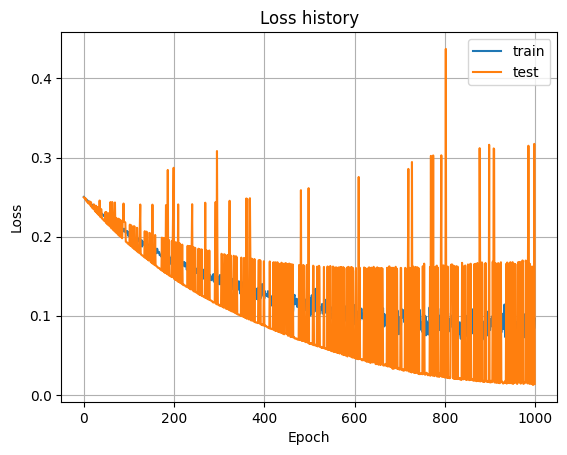

In [105]:
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.legend();